In [1]:
import random 
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

def buildRandSeq(n):
    '''Given a number n, this builds a random gene sequence of length n.
    Utilizes the sequence and sequence record classes from Bio.  Just
    provides these sequence classes with a random string of base pairs.'''   
    return buildNPSeq(n,1)

def buildNRandSeq(n,N):
    '''Given a length of sequences and a number of sequences to build,
    this method builds N random sequences of length n each.  Passes
    sequence records into a multiple sequence alignment class.'''
            
    return buildNPSeq(n,N)

def buildPSeq(n,p=[1/4,1/4,1/4,1/4]):
    '''Returns a sequence of base pairs which are distributed
    in the string of base pairs AGTC with probabilities
    for AGTC specified by p.  By default, this is uniform.'''
    if sum(p) != 1:
        return "Invalid probability distribution.  Does not sum to one."
    
    return buildNNormalSeq(n,1,p)

def buildNPSeq(n,N,p=[1/4,1/4,1/4,1/4]):
    classGCut = p[0]
    classTCut = sum(p[:1])
    classCCut = sum(p[:2])
    
    seqList = []
    basePairs = ['A','G','T','C']
    for j in range(N):
        seq = ''
        for i in range(n):
            r = random.random()
            if  r >= classCCut:
                seq = seq+basePairs[3]
            elif r >= classTCut:
                seq = seq+basePairs[2]
            elif r >= classGCut:
                seq = seq+basePairs[1]
            else:
                seq = seq+basePairs[0]
                
        seqList.append(SeqRecord(Seq(seq),id='RAND'+str(j)+str(p)))
        
    return MultipleSeqAlignment(seqList)

def combineAligns(alignList):
    '''Takes a list of MultipleSeqAlignments and combines them all together.
    Assumes that each sequence record has the same count of base pairs.'''
    seqList = []
    for align in alignList:
        for record in align:
            seqList.append(record)
    return MultipleSeqAlignment(seqList)

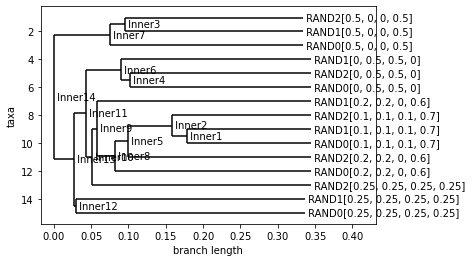

        ________________________ RAND2[0.1, 0.1, 0.1, 0.7]
    ___|
   |   | _____________________ RAND1[0.1, 0.1, 0.1, 0.7]
  _|   ||
 | |    |___________________ RAND0[0.1, 0.1, 0.1, 0.7]
 | |
 | |___________________________________ RAND0[0.2, 0.2, 0, 0.6]
 |
 |  _______________________________ RAND2[0.2, 0.2, 0, 0.6]
 |,|
 |||__________________________________ RAND1[0.2, 0.2, 0, 0.6]
 ||
 ||  ______________________________________ RAND0[0.25, 0.25, 0.25, 0.25]
 || |
 ||_|        _______________________________ RAND1[0, 0.5, 0.5, 0]
 |  | ______|
_|  ||      |   ______________________________ RAND2[0, 0.5, 0.5, 0]
 |  ||      |__|
 |   |         |_____________________________ RAND0[0, 0.5, 0.5, 0]
 |   |
 |   |______________________________________ RAND1[0.25, 0.25, 0.25, 0.25]
 |
 |_____________________________________ RAND2[0.25, 0.25, 0.25, 0.25]
 |
 |           _____________________________ RAND2[0.5, 0, 0, 0.5]
 |        __|
 |_______|  |______________________________ RAND1[0.5,

In [9]:
#generate some random alignments
n = 500 #Number of base pairs in each sequence.
N = 3 #Number of alignments to build.
pList = [[0.25,0.25,.25,.25],[0.2,.2,0,.6],[.1,.1,.1,.7],[0,.5,.5,0],[0.5,0,0,.5]]

#randAligns = buildNRandSeq(n,N)
randPAlignsList = [buildNPSeq(n,N,p) for p in pList] 

#print(randPAligns1)
#print(randPAligns2)
# Calculate the distance matrix
calc = DistanceCalculator('identity')
distM = calc.get_distance(combineAligns(randPAlignsList))
#print(distM)

# Create a DistanceTreeConstructor object
const = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
RandUPGMATree = const.upgma(distM)
# Construct the phlyogenetic tree using NJ algorithm
NJTree = const.nj(distM)

# Draw the phlyogenetic tree
Phylo.draw(RandUPGMATree)
# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)